Разработать программу реализующую интегрирование заданной функции методом средних прямоугольников (или иным методом, на выбор) с адаптивной сеткой. Сравнить скорость сходимости данного метода и метода с равномерной сеткой. Указание: для выбора "наибольшего" интервала используйте модуль heapq из стандартной библиотеки. (При использовании языка C++, используйте std::set).

Метод средних прямоугольнико с равномерной сеткой

![kkk](https://cdn1.savepice.ru/uploads/2018/10/13/dc018fc7a2938ffb101c585cb276760c-full.jpg)

where $h$ is the width of the sub-intervals and in this case h is the same for all interval $[a,b]$.

In [6]:
import numpy as np
from heapq import *

In [2]:
# Midpoint method
def midpoint(f, a, b, n):
    h = float(b-a)/n
    result = 0
    for i in range(n):
        result += f((a + h/2.0) + i*h)
    result *= h
    return result

In [5]:
# Function for intergate
def f(x):
    return np.exp(-x)
a, b = 0, 20

In [4]:
for i in range(1,20):
    n = 2**(i-1)
    m = midpoint(f, a, b, n)
    print ('Steps of grid:', n , 'Square of integral by midpoint method:', m)   

Steps of grid: 1 Square of integral by midpoint method: 0.0009079985952496971
Steps of grid: 2 Square of integral by midpoint method: 0.0673825290140597
Steps of grid: 4 Square of integral by midpoint method: 0.4132091737860514
Steps of grid: 8 Square of integral by midpoint method: 0.7803140700395551
Steps of grid: 16 Square of integral by midpoint method: 0.937745315350861
Steps of grid: 32 Square of integral by midpoint method: 0.9839075024308651
Steps of grid: 64 Square of integral by midpoint method: 0.995942547561725
Steps of grid: 128 Square of integral by midpoint method: 0.9989834692328925
Steps of grid: 256 Square of integral by midpoint method: 0.9997457300536715
Steps of grid: 512 Square of integral by midpoint method: 0.9999364224806402
Steps of grid: 1024 Square of integral by midpoint method: 0.9999841035437852
Steps of grid: 2048 Square of integral by midpoint method: 0.9999960243069246
Steps of grid: 4096 Square of integral by midpoint method: 0.9999990045287919
Steps 

In [ ]:
from numpy import exp
v = lambda t: 3*t**2*exp(t**3)
%timeit midpoint(v, 0, 1, 1000)

Метод средних прямоугольнико с адаптивной сетокй

In [7]:
# A rectangle is (start, width)
# A list element is (-weight, (start, width))
def make_rect(a, b, f):
    """Make a rectangle for the interval [a, b]"""
    rect = (a, b-a)
    xm = a + rect[1] / 2.
    square = -f(xm) * rect[1]
    return (square, rect)    

def get_max_elem(h):    
    big_elem = heappop(h)    
    return big_elem, h   

def adapt_rect(f, a, b, n):
    h = []
    item = make_rect(a, b, f)
    heappush(h, item)
    for _ in range(n):
        rect, lst = get_max_elem(h)
        w, (start, width) = rect
        # and split it into two halves
        c = start + width / 2.        
        rect1 = make_rect(start, c, f)
        rect2 = make_rect(c, start + width, f)
        heappush(h, rect1)
        heappush(h, rect2)        
    return -sum(w for w, r in h)

In [8]:
for i in range(1,20):
    n = 2**(i-1) 
    res = adapt_rect(f, a, b, n)
    print ('Steps of grid:', n, 'Square of integral by adapt grid method:', res)

Steps of grid: 1 Square of integral by adapt grid method: 0.0673825290140597
Steps of grid: 2 Square of integral by adapt grid method: 0.4131934739934382
Steps of grid: 4 Square of integral by adapt grid method: 0.9223333397188652
Steps of grid: 8 Square of integral by adapt grid method: 0.9646729216747371
Steps of grid: 16 Square of integral by adapt grid method: 0.9773506482466587
Steps of grid: 32 Square of integral by adapt grid method: 0.9935088358210467
Steps of grid: 64 Square of integral by adapt grid method: 0.9943720113277266
Steps of grid: 128 Square of integral by adapt grid method: 0.9956530781155606
Steps of grid: 256 Square of integral by adapt grid method: 0.9959506359510505
Steps of grid: 512 Square of integral by adapt grid method: 0.9960035579301553
Steps of grid: 1024 Square of integral by adapt grid method: 0.9997395353755041
Steps of grid: 2048 Square of integral by adapt grid method: 0.9998300524712693
Steps of grid: 4096 Square of integral by adapt grid method: 

Сравнить скорость сходимости данных методетодов.

Оценка скорости сходимости производится при помощи вычисления апосториорной ошибки метода (та, которая не известна сразу, а на ходится на каждом шаге вычисления).

Для оценки погрешности используются значения полученные на двух разных сетках (первая формула Ричардсона).

По формуле ниже можно оценить эффективный порядок точности метода или скорость сходимости. Немонотонность $r$ говорит о том,
что начальное разбиение сетки выбрано слишком грубо или наоборот, о  том что сетка слишком подробна. 


![kkk](https://cdn1.savepice.ru/uploads/2018/10/14/d63665e759212ffa993369b434d53dcd-full.jpg)

Где $r_i$ - сходимость на $i$ шаге, $E$ - ошибка, $n$ - шаг 

In [10]:
# deriviat function f
def F(x):
    return (-np.exp(-x))
a, b = 0, 20
# exact integral
analitic = F(b) - F(a)

In [11]:
# find errors of methods
for i in range(1,20):
    n = 2**(i-1)
    print('Steps of grid:', n , 'Error of calc by adapt grid:', np.abs(adapt_rect(f, a, b, n) - analitic),'Error of calc by midpoint:', np.abs(midpoint(f, a, b, n) - analitic))

Steps of grid: 1 Error of calc by adapt grid: 0.9326174689247867 Error of calc by midpoint: 0.9990919993435967
Steps of grid: 2 Error of calc by adapt grid: 0.5868065239454082 Error of calc by midpoint: 0.9326174689247867
Steps of grid: 4 Error of calc by adapt grid: 0.0776666582199812 Error of calc by midpoint: 0.586790824152795
Steps of grid: 8 Error of calc by adapt grid: 0.03532707626410936 Error of calc by midpoint: 0.2196859278992913
Steps of grid: 16 Error of calc by adapt grid: 0.02264934969218768 Error of calc by midpoint: 0.06225468258798539
Steps of grid: 32 Error of calc by adapt grid: 0.006491162117799765 Error of calc by midpoint: 0.016092495507981308
Steps of grid: 64 Error of calc by adapt grid: 0.005627986611119851 Error of calc by midpoint: 0.004057450377121463
Steps of grid: 128 Error of calc by adapt grid: 0.004346919823285833 Error of calc by midpoint: 0.001016528705953923
Steps of grid: 256 Error of calc by adapt grid: 0.00404936198779593 Error of calc by midpoint

In [12]:
E = []
q = []
for i in range(1,20):
    n = 2**(i-1)
    c = abs(analitic - midpoint(f, a, b, n))
    E.append(c)
    q.append(n)
r = []
for t in range(0,19):
    r_im1 = np.log(E[t]/E[t-1])/np.log(float(q[t])/q[t-1])
    r.append(r_im1)
    r[t] = float('%.2f' % r_im1)
    print('Steps of grid:', q[t],'Convergence speed of midpoint method:', r[t])

Steps of grid: 1 Convergence speed of midpoint method: -1.77
Steps of grid: 2 Convergence speed of midpoint method: -0.1
Steps of grid: 4 Convergence speed of midpoint method: -0.67
Steps of grid: 8 Convergence speed of midpoint method: -1.42
Steps of grid: 16 Convergence speed of midpoint method: -1.82
Steps of grid: 32 Convergence speed of midpoint method: -1.95
Steps of grid: 64 Convergence speed of midpoint method: -1.99
Steps of grid: 128 Convergence speed of midpoint method: -2.0
Steps of grid: 256 Convergence speed of midpoint method: -2.0
Steps of grid: 512 Convergence speed of midpoint method: -2.0
Steps of grid: 1024 Convergence speed of midpoint method: -2.0
Steps of grid: 2048 Convergence speed of midpoint method: -2.0
Steps of grid: 4096 Convergence speed of midpoint method: -2.0
Steps of grid: 8192 Convergence speed of midpoint method: -2.0
Steps of grid: 16384 Convergence speed of midpoint method: -2.0
Steps of grid: 32768 Convergence speed of midpoint method: -2.0
Steps

In [13]:
E = []
q = []
for i in range(1,20):
    n = 2**(i-1)
    c = abs(analitic - adapt_rect(f, a, b, n))
    E.append(c)
    q.append(n)
ra = []
for t in range(0,19):
    r_im1a = np.log(E[t]/E[t-1])/np.log(float(q[t])/q[t-1])
    ra.append(r_im1a)
    ra[t] = float('%.2f' % r_im1a)
    print('Steps of grid:', q[t],'Convergence speed of adapt grid method:', ra[t])

Steps of grid: 1 Convergence speed of adapt grid method: -0.8
Steps of grid: 2 Convergence speed of adapt grid method: -0.67
Steps of grid: 4 Convergence speed of adapt grid method: -2.92
Steps of grid: 8 Convergence speed of adapt grid method: -1.14
Steps of grid: 16 Convergence speed of adapt grid method: -0.64
Steps of grid: 32 Convergence speed of adapt grid method: -1.8
Steps of grid: 64 Convergence speed of adapt grid method: -0.21
Steps of grid: 128 Convergence speed of adapt grid method: -0.37
Steps of grid: 256 Convergence speed of adapt grid method: -0.1
Steps of grid: 512 Convergence speed of adapt grid method: -0.02
Steps of grid: 1024 Convergence speed of adapt grid method: -3.94
Steps of grid: 2048 Convergence speed of adapt grid method: -0.62
Steps of grid: 4096 Convergence speed of adapt grid method: -1.5
Steps of grid: 8192 Convergence speed of adapt grid method: -0.16
Steps of grid: 16384 Convergence speed of adapt grid method: -0.25
Steps of grid: 32768 Convergence s

Оценка сходимости метода удобна для проверки корректности работы алгоритма. Для этого удобно строить графики.

<IPython.core.display.Javascript object>


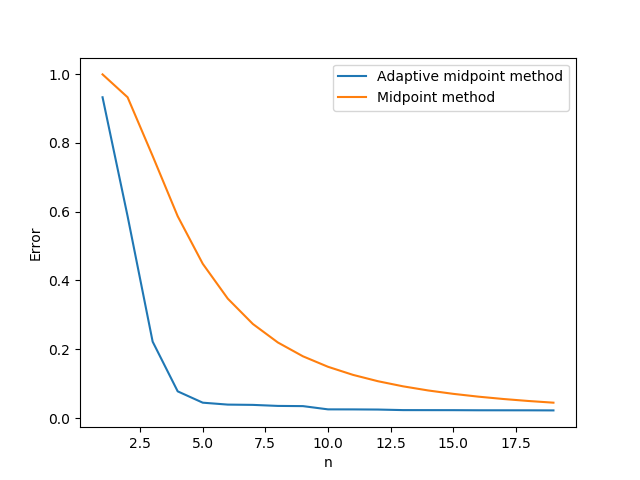

In [26]:
import matplotlib.pyplot as plt
%matplotlib notebook
res1 = []
res2 = []

a, b = 0, 20
step = []
for n in range(1,20):
    
    step.append(n)
    res1.append(abs(adapt_rect(f, a, b, n)-analitic))
    res2.append(abs(midpoint(f,a,b,n)-analitic))
    
    
plt.figure()


plt.plot(step, res1, label='Adaptive midpoint method')
plt.plot(step, res2, label='Midpoint method')


plt.legend()
plt.ylabel('Error')
plt.xlabel('n')

plt.show()


<IPython.core.display.Javascript object>


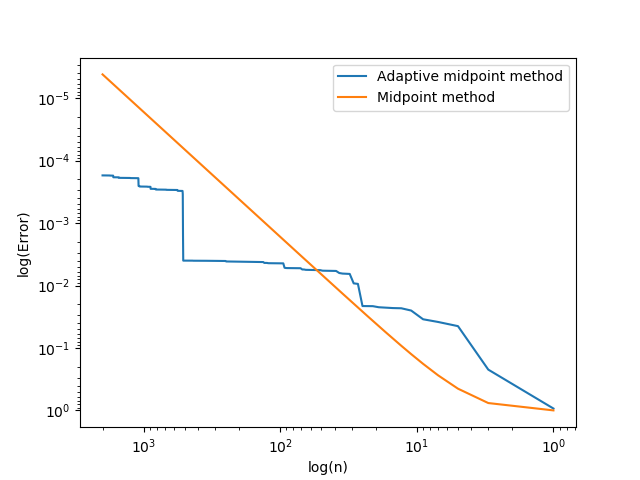

In [38]:
ada = []
mid = []

a, b = 0, 20
step = []
for n in range(1,2000,2):
    step.append(n)
    ada.append(abs(adapt_rect(f, a, b, n)-analitic))
    mid.append(abs(midpoint(f,a,b,n)-analitic))
    
    
plt.figure()

plt.loglog(step, ada, label='Adaptive midpoint method')
plt.loglog(step, mid, label='Midpoint method')


plt.gca().invert_xaxis()
plt.gca().invert_yaxis()


plt.legend()
plt.ylabel('log(Error)')
plt.xlabel('log(n)')

plt.show()


<IPython.core.display.Javascript object>


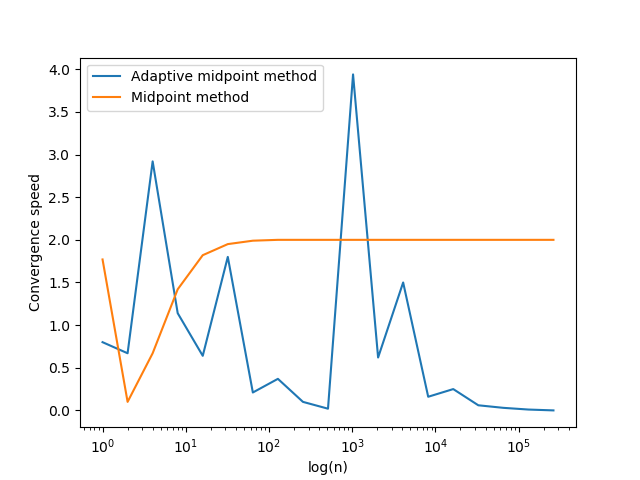

In [37]:
ada = [x * -1 for x in ra]
mid = [x * -1 for x in r]

plt.figure()

plt.plot(q, ada, label='Adaptive midpoint method')
plt.plot(q, mid, label='Midpoint method')



plt.legend()
plt.xscale('log')
plt.ylabel('Convergence speed')
plt.xlabel('log(n)')

plt.show()
